In [11]:
# Importamos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos matplotlib para visualizacion
from google.colab.patches import cv2_imshow # Importamos funcion para mostrar imagenes en colab

In [12]:
# Cargar Imagen de Ejemplo
from urllib.request import urlopen  # Para Abrir URLs

In [13]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array coomo una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imagenes en formato RGB, lo convertimos a RGB para visualizacion correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
#1. Suavizado de imagen con filtro gaussiano
# Aplicamos un filtro gaussiano para suavizar la imagen (kernel 5x5)
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0) # (5,5) es el tamaño del kernel, 0 es desviacion standart

In [19]:
#2. Filtro de desenfoque medio
# Aplicamos un filtro de promedio para suavizar la imagen (kernel de 5x5)
average_blur = cv2.blur(image_rgb, (5, 5)) # (5,5) tamaño del kernel

In [20]:
# 3. Filtro de desenfoque mediano
# Aplicamos un filtro de mediana para reducir el ruido (tamaño de ventana 5)
median_blur = cv2.medianBlur(image_rgb, 5) # 5 es el tamaño de la ventana

In [21]:
# 4. Filtro de desenfoque bilateral
# Este filtro preserva los bordes mientras suaviza las areas planas
bilateral_blur = cv2.bilateralFilter(image_rgb, 9, 75, 75) # 9 Es el diametro del vecindario, 75 son sigma color y espaciado

In [22]:
# 5. Ajuste de Brillo y contraste
# Ajustamos brillo y contraste usando transformación lineal alpha*img + beta
alpha = 1.5 # Factor de contraste (>1 aumenta, <1 disminuye)
beta = 30   # Factor de brillo (>0 aumenta, <0 disminuye)
adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta) # Aplicamos la transformación

In [23]:
# 6. Ecualización de Histograma (en escala de grises)
# Convertimos a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Aplicamos ecualización de histograma para mejorar el contraste
equalized = cv2.equalizeHist(gray_image)

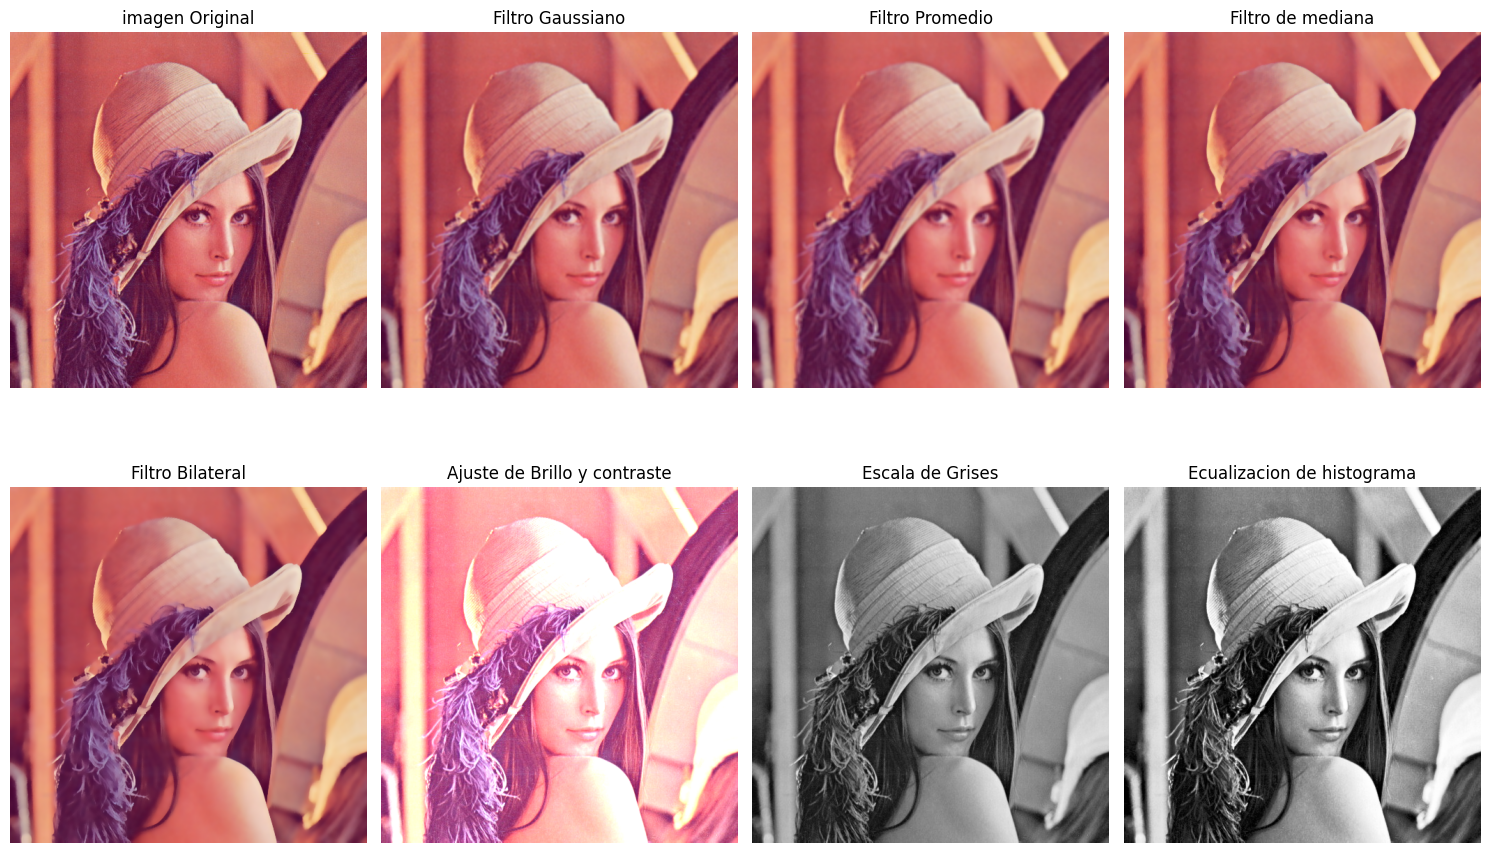

In [30]:
# Visualización de todos los filtros
plt.figure(figsize=(15, 10)) # Creamos una figura con tamaño especifico

# Imagen original
plt.subplot(2, 4, 1) # Creamos un subplot en la posicion 1
plt.title('imagen Original') # Añadimos un titulo
plt.imshow(image_rgb) # Mostramos la imagen
plt.axis('off') # ocultamos los ejes

# Imagen con filtro gaussiano
plt.subplot(2, 4, 2) # Creamos un subplot en la posicion 2
plt.title('Filtro Gaussiano') # Añadimos un titulo
plt.imshow(blurred_image) # Mostramos la imagen con filtro gaussiano
plt.axis('off') # ocultamos los ejes

# Imagen con filtro promedio
plt.subplot(2, 4, 3) # Creamos un subplot en la posicion 3
plt.title('Filtro Promedio') # Añadimos un titulo
plt.imshow(average_blur) # Mostramos la imagen con filtro promedio
plt.axis('off') # ocultamos los ejes

# Imagen con filtro mediana
plt.subplot(2, 4, 4) # Creamos un subplot en la posicion 4
plt.title('Filtro de mediana') # Añadimos un titulo
plt.imshow(median_blur) # Mostramos la imagen con filtro de mediana
plt.axis('off') # ocultamos los ejes

# Imagen con filtro bilateral
plt.subplot(2, 4, 5) # Creamos un subplot en la posicion 5
plt.title('Filtro Bilateral') # Añadimos un titulo
plt.imshow(bilateral_blur) # Mostramos la imagen con filtro Bilateral
plt.axis('off') # ocultamos los ejes

# Imagen con ajuste de brillo y contraste
plt.subplot(2, 4, 6) # Creamos un subplot en la posicion 6
plt.title ('Ajuste de Brillo y contraste') # Añadimos un titulo
plt.imshow(adjusted) # Mostramos la imagen con ajuste de brillo y contraste
plt.axis('off') # Ocultamos los ejes

# Imagen original en escala de grises
plt.subplot(2, 4, 7) # Creamos un subplot en la posicion 7
plt.title ('Escala de Grises') # Añadimos un titulo
plt.imshow(gray_image, cmap='gray') # Mostramos la imagen con ajuste de brillo y contraste
plt.axis('off') # Ocultamos los ejes

# Imagen con ecualizacion de histogramas
plt.subplot(2, 4, 8) # Creamos un subplot en la posicion 8
plt.title ('Ecualizacion de histograma') # Añadimos un titulo
plt.imshow(equalized, cmap='gray') # Mostramos la imagen con ajuste de brillo y contraste
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos
plt.show()  # Mostramos la figura completa

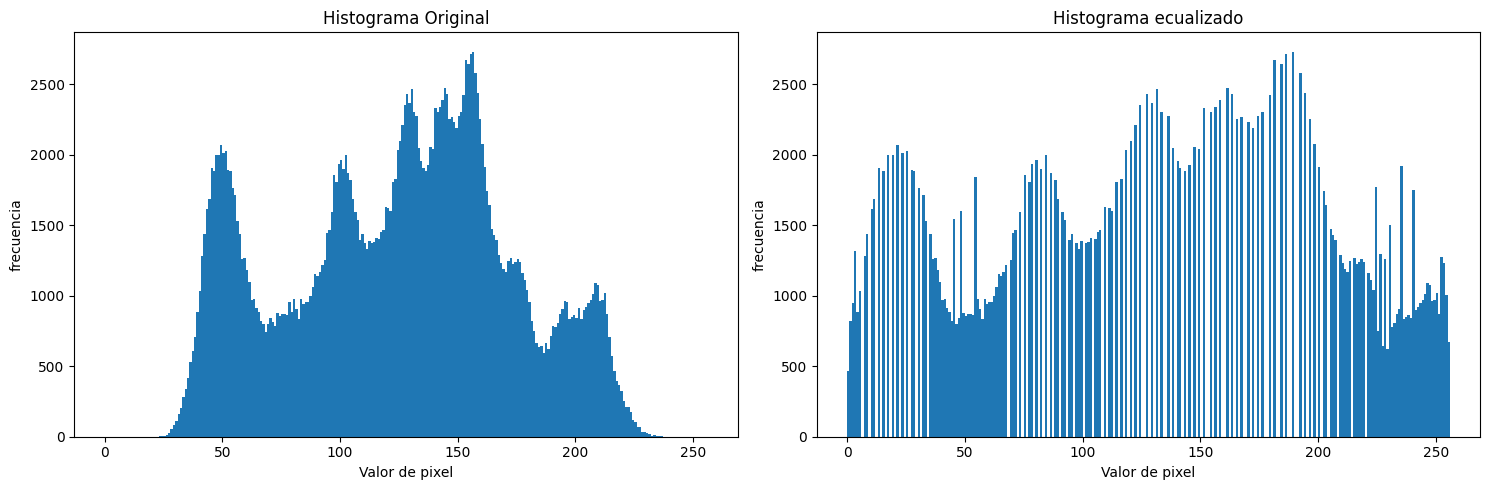

In [32]:
# Visualización de Histogramas
plt.figure(figsize=(15, 5))   # Creamos una figura con tamaño especifico

# Histograma de la imagen original en escala de grises
plt.subplot(1, 2, 1) # Creamos un subplot en la posición 1
plt.title('Histograma Original') #Añadimos un titulo
plt.hist(gray_image.ravel(), bins=256, range=(0, 256)) # Calculamos y mostramos el histograma
plt.xlabel('Valor de pixel') # Etiqueta eje x
plt.ylabel('frecuencia') # Etiqueta eje y

# Histograma de la imagen ecualizada
plt.subplot(1, 2, 2) # Creamos un subplot en la posición 2
plt.title('Histograma ecualizado') #Añadimos un titulo
plt.hist(equalized.ravel(), bins=256, range=(0, 256)) # Calculamos y mostramos el histograma
plt.xlabel('Valor de pixel') # Etiqueta eje x
plt.ylabel('frecuencia') # Etiqueta eje y

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos
plt.show()  # Mostramos la figura completa

In [47]:
# 1. Filtro Sobel
# Detecta Contornos o cambios bruscos de intensidad en una imagen perfecto para localizar objetos
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradiente en X
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradiente en Y
sobel_combined = cv2.magnitude(sobelx, sobely)             # Magnitud combinada

# 2. Filtro Sharpen (enfoque)
# Aplicamos un kernel que realza los bordes y mejora la nitidez de la imagen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_sharpen)

# 3. Filtro de alta frecuencia (High Pass Filter)
# Aplicamos un filtro que elimina componentes suaves y resalta detalles finos
kernel_highpass = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])
highpass = cv2.filter2D(image_rgb, -1, kernel_highpass)

# 4. Realce de color
# Intensifica los colores de la imagen aumentando la saturación
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
s = cv2.multiply(s, 1.5)  # Incrementa saturación en 50%
s = np.clip(s, 0, 255)
color_boosted = cv2.cvtColor(cv2.merge([h, s, v]).astype(np.uint8), cv2.COLOR_HSV2RGB)


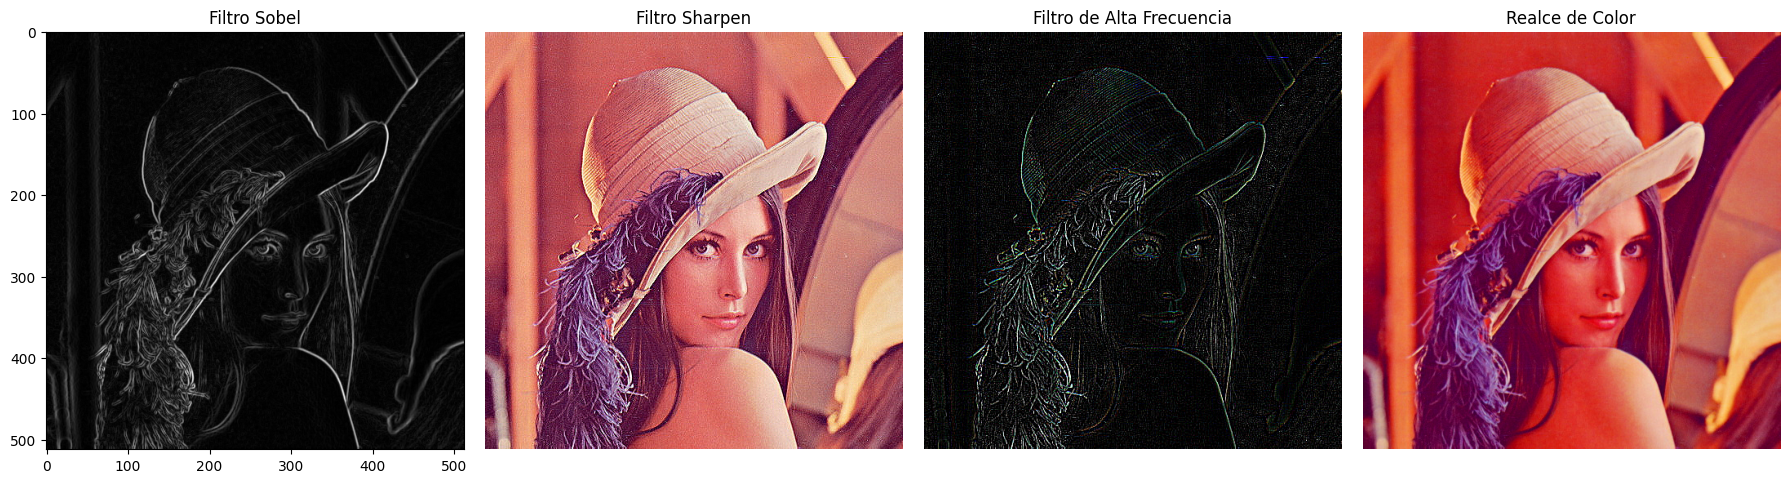

In [48]:
# Visualización de todos los filtros
plt.figure(figsize=(18, 12)) # Creamos una figura con tamaño especifico

#Imagen con filtro Sobel
plt.subplot(1, 4, 1)  # Creamos un subplot en la posición 1
plt.title('Filtro Sobel')  # Añadimos un título
plt.imshow(sobel_combined, cmap='gray')  # Mostramos la imagen en escala de grises

# Imagen con filtro Sharpen
plt.subplot(1, 4, 2)  # Creamos un subplot en la posición 2
plt.title('Filtro Sharpen')  # Añadimos un título
plt.imshow(sharpened)  # Mostramos la imagen con el filtro de enfoque
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro de alta frecuencia
plt.subplot(1, 4, 3)  # Creamos un subplot en la posición 3
plt.title('Filtro de Alta Frecuencia')  # Añadimos un título
plt.imshow(highpass)  # Mostramos la imagen con el filtro de alta frecuencia
plt.axis('off')  # Ocultamos los ejes

# Imagen con realce de color
plt.subplot(1, 4, 4)  # Subplot en la posición 5
plt.title('Realce de Color')
plt.imshow(color_boosted)
plt.axis('off')

plt.axis('off')  # Ocultamos los ejes
plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos
plt.show()  # Mostramos la figura completa